In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# For custom analysis functions
import analysis_helper_functions as ahf

d:\EOAS\Staircase_Clustering\analysis_helper_functions.py:4010: SyntaxWarning: invalid escape sequence '\e'
  line_label = "$R_L = -\exp( %.2f - p/ %.2f )$"%(c/abs(m),abs(m))


In [2]:
dfs0 = ahf.Data_Filters()
# All profiles from all ITPs in this study
all_ITPs = {'ITP_2':'all','ITP_3':'all'}

# All profiles from certain ITPs
ITP2_all  = {'ITP_2':'all'}
ITP3_all  = {'ITP_3':'all'}

# Some specific profiles
ITP2_pfs  = {'ITP_2':[183, 185, 187]}

ds_all_ITPs = ahf.Data_Set(all_ITPs, dfs0)

ds_ITP2_all = ahf.Data_Set(ITP2_all, dfs0)
ds_ITP3_all = ahf.Data_Set(ITP3_all, dfs0)

ds_ITP2_pfs = ahf.Data_Set(ITP2_pfs, dfs0)


# Define practical salinity ranges to use
ITP2_SP_range = [34.05, 34.75]
ITP3_SP_range = [34.21, 34.82]
# Create Profile_Filters objects
pfs_ITP2 = ahf.Profile_Filters(SP_range=ITP2_SP_range)
pfs_ITP3 = ahf.Profile_Filters(SP_range=ITP3_SP_range)
# Create a Profile_Filters object with the default filters
pfs_0 = ahf.Profile_Filters()

# Timmermans et al. 2008 Figure 4 depth range
T2008_fig4_y_lims = {'y_lims':[260,220]}
# Timmermans et al. 2008 Figure 5 x and y limits
T2008_fig5a_ax_lims = {'x_lims':[34.05,34.75], 'y_lims':[-1.3,0.5]}
# Timmermans et al. 2008 Figure 5 x limits
T2008_fig5a_x_lims = {'x_lims':[34.05,34.75]}
# Timmermans et al. 2008 Figure 6 x and y limits
T2008_fig6a_ax_lims = {'x_lims':[0.026838,0.026878], 'y_lims':[-13e-6,3e-6]}

# Reproducing Timmermans et al. 2008 Figure 4, with cluster coloring and 2 extra profiles
pp_T2008_fig4  = ahf.Plot_Parameters(x_vars=['SP'], y_vars=['press'], plot_type='profiles', clr_map='cluster', ax_lims=T2008_fig4_y_lims)
# The actual clustering done for reproducing figures from Timmermans et al. 2008
pp_T2008_clstr = ahf.Plot_Parameters(x_vars=['SP'], y_vars=['la_CT'], clr_map='cluster', ax_lims=T2008_fig5a_x_lims, legend=False)

# Reproducing Timmermans et al. 2008 Figure 5a, but with cluster coloring
pp_T2008_fig5a = ahf.Plot_Parameters(x_vars=['SP'], y_vars=['CT'], clr_map='cluster', extra_args={'isopycnals':0, 'plt_noise':False}, ax_lims=T2008_fig5a_ax_lims, legend=False)

# Reproducing Timmermans et al. 2008 Figure 6a, but with cluster coloring
pp_T2008_fig6a = ahf.Plot_Parameters(x_vars=['BSP'], y_vars=['aCT'], clr_map='cluster', extra_args={'plot_slopes':True, 'isopycnals':True}, ax_lims=T2008_fig6a_ax_lims, legend=False)

### Figure 2
## Using ITP2, reproducing figures from Timmermans et al. 2008
# Make the Analysis Groups
group_T2008_clstr = ahf.Analysis_Group(ds_ITP2_all, pfs_ITP2, pp_T2008_clstr, plot_title='')
group_T2008_fig4  = ahf.Analysis_Group(ds_ITP2_pfs, pfs_ITP2, pp_T2008_fig4,  plot_title='')
group_T2008_fig5a = ahf.Analysis_Group(ds_ITP2_all, pfs_ITP2, pp_T2008_fig5a, plot_title='')
group_T2008_fig6a = ahf.Analysis_Group(ds_ITP2_all, pfs_ITP2, pp_T2008_fig6a, plot_title='')


- Applying profile filters
- Applying profile filters
- Applying profile filters
- Applying profile filters


In [14]:
# tests for full analysis:
test_pfs  = {'ITP_2':[183, 185, 187, 189, 191]}
test_ITP2_pfs = ahf.Data_Set(test_pfs, dfs0)
test_ITP2_SP_range = [28, 34.75]
test_pfs_ITP2 = ahf.Profile_Filters(SP_range=test_ITP2_SP_range)
test_T2008_fig4_y_lims = {'y_lims':[400,220]}
test_pp_T2008_fig4  = ahf.Plot_Parameters(x_vars=['SP'], y_vars=['press'], plot_type='profiles', clr_map='cluster', ax_lims=test_T2008_fig4_y_lims)

test_group_T2008_fig4  = ahf.Analysis_Group(test_ITP2_pfs, test_pfs_ITP2, test_pp_T2008_fig4,  plot_title='')



- Applying profile filters


	- Re-run HDBSCAN: False
	- Using clustering results from file
		Clustering x-axis: ['SP']
		Clustering y-axis: ['la_CT']
		Clustering m_pts:  [170]
		Clustering filters:   ['SP range: [34.05, 34.75] ']
		Clustering DBCV:   [0.30346079572338464]
	- Profiles to plot: [183. 185. 187. 189. 191.]


d:\EOAS\Staircase_Clustering\analysis_helper_functions.py:3132: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pf_label = pf_df['source'][0]+pf_df['instrmt'][0]+'-'+str(int(pf_df['prof_no'][0]))


	- Inverting y-axis
	- Set y_lims to [400, 220]
	- Adding grid lines: True
- Saving figure to outputs/test.png


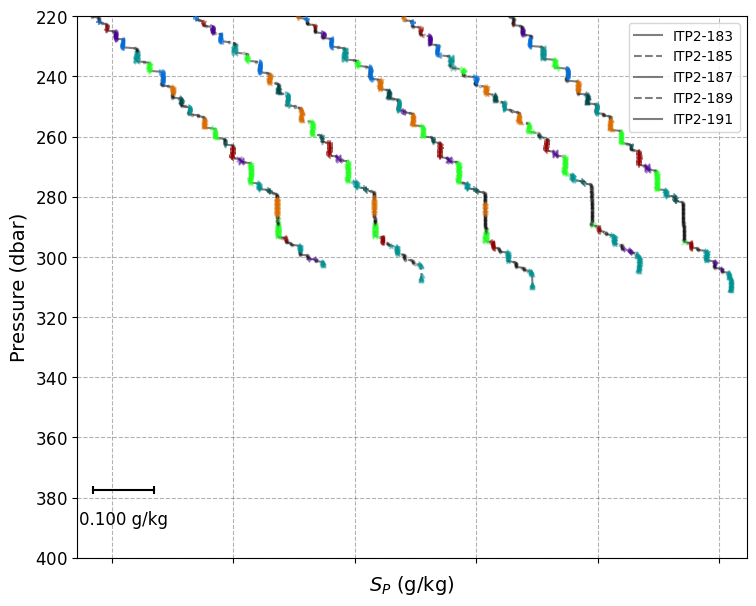

In [15]:
# Make the figure
# ahf.make_figure([group_T2008_fig5a, group_T2008_fig4, group_T2008_clstr, group_T2008_fig6a], filename='Figure_2.png')
ahf.make_figure([test_group_T2008_fig4], filename='test.png')